In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

from scipy.stats import spearmanr
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import RepeatedKFold, KFold

np.set_printoptions(threshold=sys.maxsize, suppress=True)
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [3]:
word2vec_wiki = pd.read_csv("cv_preds_word2vec_wiki.csv")
fasttext_wiki = pd.read_csv("cv_preds_fasttext_wiki.csv")

word2vec_gigaword = pd.read_csv("cv_preds_word2vec_giga.csv")
fasttext_gigaword = pd.read_csv("cv_preds_fasttext_giga.csv")

word2vec_ukwac = pd.read_csv("cv_preds_word2vec_ukwac.csv")
fasttext_ukwac = pd.read_csv("cv_preds_fasttext_ukwac.csv")

In [4]:
# Get norm and annotation values. Norms and annotations are identical for each dataset. Scores change.    

w2v_wiki_df, w2v_annos = word2vec_wiki.set_index('norm'), word2vec_wiki.set_index('annotation')
fast_wiki_df = fasttext_wiki.set_index('norm')

w2v_giga_df = word2vec_gigaword.set_index('norm')
fast_giga_df = fasttext_gigaword.set_index('norm')

w2v_ukwac_df = word2vec_ukwac.set_index('norm')
fast_ukwac_df = fasttext_ukwac.set_index('norm')

norms = [norm for norm in w2v_wiki_df.index]
annotations = [anno for anno in w2v_annos.index]

In [5]:
def map_annotations(annotations):
    
    annotations_map = {'carbohydrate': 0, 'grain': 1, 'nut': 2, 'legume': 3, 'dairy': 4, 'protein': 5, 'fish': 6, 'fruit': 7, 
                       'vegetable': 8, 'fungi': 9, 'herb': 10, 'fat/salt/sugar/alcohol': 11, 'sweet': 12, 'condiment': 13}

    annotation = np.asarray([annotations_map[annotation] for annotation in annotations])
    
    return annotation

map_annotations(annotations)

array([ 2,  6,  7,  7,  8,  8,  7,  5,  0,  8,  7,  1, 10,  3,  5,  8,  7,
        3,  7,  7,  0,  0,  8,  0,  8, 11,  8,  5,  8,  6,  8,  6,  0,  4,
        7,  5,  3,  8,  8, 12,  5,  6, 12, 12,  2,  6, 12, 10,  0,  4,  0,
        6,  4,  8,  8,  7, 12,  5,  0,  7,  6,  8,  5,  5,  3,  8,  7,  5,
        4,  5,  5,  4,  0,  4,  5,  7,  7,  4,  3,  7,  6,  6,  5,  2,  6,
       11,  5,  8,  3,  7,  8,  7,  5,  8,  7, 10,  3,  8,  7,  7,  6,  6,
        7,  7, 11,  7,  6,  0,  9,  6, 13,  5,  0,  0,  6, 11,  8,  7,  0,
        7, 10,  8,  7,  0,  8,  7,  7,  8,  5,  5,  6,  7,  6,  7,  7,  7,
        7,  5,  8,  5,  6,  4,  5,  7,  0,  8,  5,  4,  5,  8,  8,  7,  7,
        0,  0,  0,  5,  6, 11,  6,  5,  6,  6, 11,  8,  6,  5, 13,  3,  8,
        8,  6,  6,  7, 11,  8,  6, 12,  0,  7, 12,  6,  9,  6,  6,  5,  5,
        5, 11,  2,  7,  1,  0,  6,  4,  8])

In [6]:
#Word2Vec WaCkypedia
happy_sad_w2v_wiki = [score for score in w2v_wiki_df['happy_sad predicted']]
healthy_unhealthy_w2v_wiki = [score for score in w2v_wiki_df['healthy_unhealthy predicted']]
cheap_exp_w2v_wiki = [score for score in w2v_wiki_df['cheap_expensive predicted']]
environ_friendly_w2v_wiki = [score for score in w2v_wiki_df['environ_friendly predicted']]
casual_posh_w2v_wiki = [score for score in w2v_wiki_df['casual_posh predicted']]
local_foreign_w2v_wiki = [score for score in w2v_wiki_df['local_foreign predicted']]

# fastText WaCkypedia
happy_sad_fast_wiki = [score for score in fast_wiki_df['happy_sad predicted']]
healthy_unhealthy_fast_wiki = [score for score in fast_wiki_df['healthy_unhealthy predicted']]
cheap_exp_fast_wiki = [score for score in fast_wiki_df['cheap_expensive predicted']]
environ_friendly_fast_wiki = [score for score in fast_wiki_df['environ_friendly predicted']]
casual_posh_fast_wiki = [score for score in fast_wiki_df['casual_posh predicted']]
local_foreign_fast_wiki = [score for score in fast_wiki_df['local_foreign predicted']]


# Word2Vec Gigaword
happy_sad_w2v_giga = [score for score in w2v_giga_df['happy_sad predicted']]
healthy_unhealthy_w2v_giga = [score for score in w2v_giga_df['healthy_unhealthy predicted']]
cheap_exp_w2v_giga = [score for score in w2v_giga_df['cheap_expensive predicted']]
environ_friendly_w2v_giga = [score for score in w2v_giga_df['environ_friendly predicted']]
casual_posh_w2v_giga = [score for score in w2v_giga_df['casual_posh predicted']]
local_foreign_w2v_giga = [score for score in w2v_giga_df['local_foreign predicted']]

# fastText Gigaword
happy_sad_fast_giga = [score for score in fast_giga_df['happy_sad predicted']]
healthy_unhealthy_fast_giga = [score for score in fast_giga_df['healthy_unhealthy predicted']]
cheap_exp_fast_giga = [score for score in fast_giga_df['cheap_expensive predicted']]
environ_friendly_fast_giga = [score for score in fast_giga_df['environ_friendly predicted']]
casual_posh_fast_giga = [score for score in fast_giga_df['casual_posh predicted']]
local_foreign_fast_giga = [score for score in fast_giga_df['local_foreign predicted']]


# Word2Vec ukWac
happy_sad_w2v_ukwac = [score for score in w2v_ukwac_df['happy_sad predicted']]
healthy_unhealthy_w2v_ukwac = [score for score in w2v_ukwac_df['healthy_unhealthy predicted']]
cheap_exp_w2v_ukwac = [score for score in w2v_ukwac_df['cheap_expensive predicted']]
environ_friendly_w2v_ukwac = [score for score in w2v_ukwac_df['environ_friendly predicted']]
casual_posh_w2v_ukwac = [score for score in w2v_ukwac_df['casual_posh predicted']]
local_foreign_w2v_ukwac = [score for score in w2v_ukwac_df['local_foreign predicted']]

# fastText ukWac
happy_sad_fast_ukwac = [score for score in fast_ukwac_df['happy_sad predicted']]
healthy_unhealthy_fast_ukwac = [score for score in fast_ukwac_df['healthy_unhealthy predicted']]
cheap_exp_fast_ukwac = [score for score in fast_ukwac_df['cheap_expensive predicted']]
environ_friendly_fast_ukwac = [score for score in fast_ukwac_df['environ_friendly predicted']]
casual_posh_fast_ukwac = [score for score in fast_ukwac_df['casual_posh predicted']]
local_foreign_fast_ukwac = [score for score in fast_ukwac_df['local_foreign predicted']]

In [144]:
# Transform x, y to numpy arrays respectively for each category

x, y = np.array(environ_friendly_w2v_wiki).reshape(-1, 1), np.array(environ_friendly_w2v_giga)

In [145]:
# Sanity check to make sure predictions are correct values

rho, pval = spearmanr(x, y)
print('Spearman Rho:', rho, "pvalue:", pval)

Spearman Rho: 0.644765676672856 pvalue: 2.027941867202742e-24


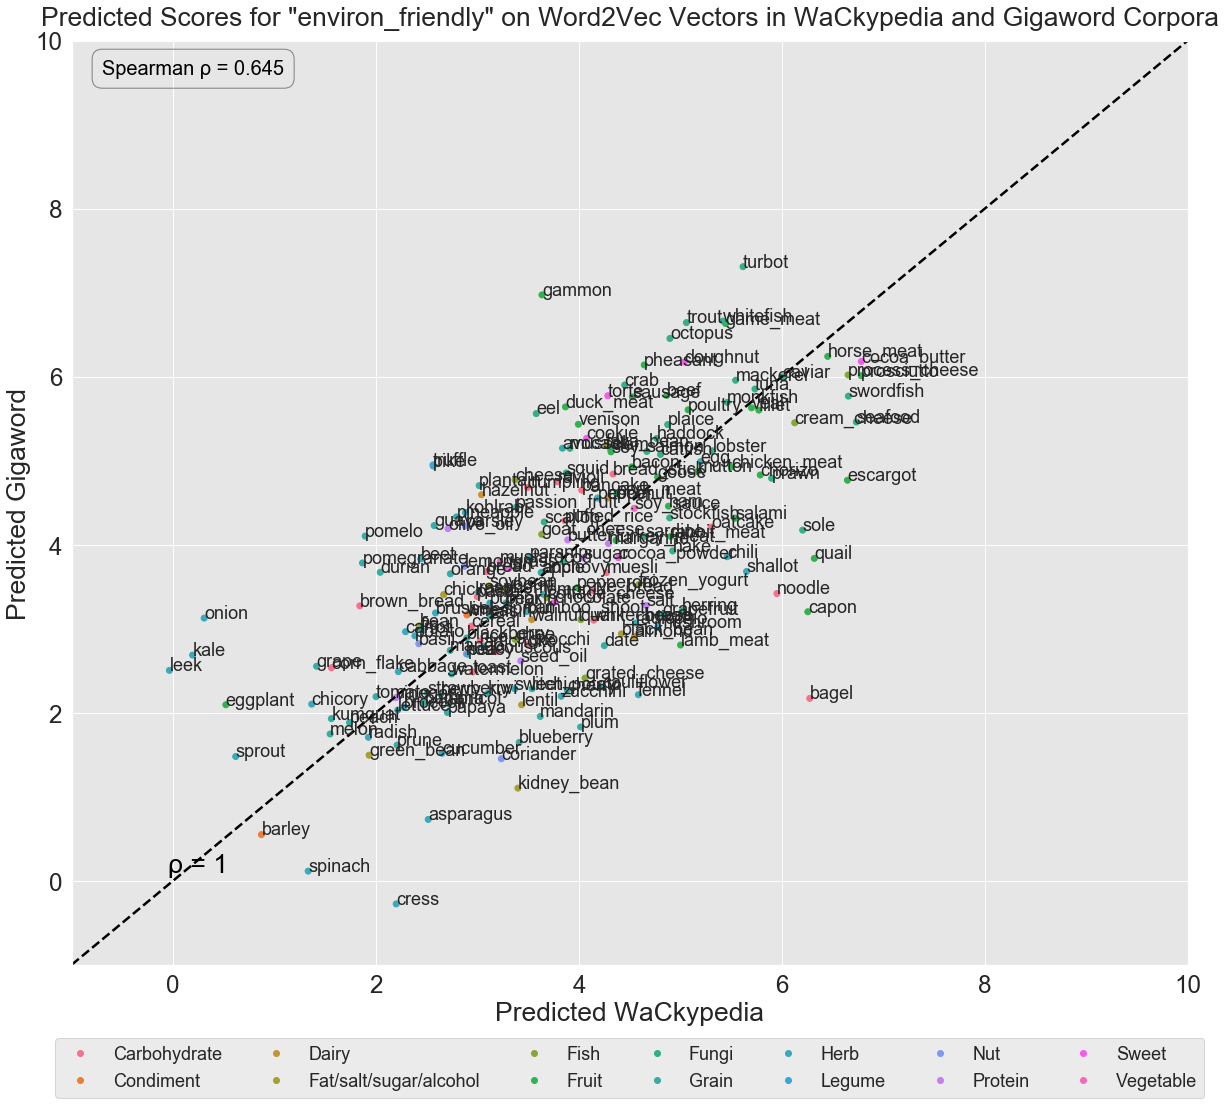

In [149]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=2.2,
                rc={"lines.linewidth": 2.5})

plt.figure(figsize=(20, 17))


num_classes = len(np.unique(annotations))
palette = np.array(sns.color_palette("husl", num_classes))

# Create labels and annotations and zip with palette
annos = list(zip(palette, sorted(list(set(annotations)))))

plt.scatter(x, y, marker='o', 
            c=palette[map_annotations(annotations).astype(np.int)], 
            cmap=plt.cm.get_cmap('hsv', num_classes))


#plt.colorbar(ticks=range(num_classes), label=list(set(sorted(annotations))))

#sns.regplot(x, y, scatter=False)

plt.title('Predicted Scores for "environ_friendly" on Word2Vec Vectors in WaCkypedia and Gigaword Corpora', y=1.01)

for i, anno in enumerate(annos):
    plt.plot([], [], ' ', c = palette[i], marker = 'o', label=str(anno[1]).capitalize())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), fontsize=18, frameon = 1, ncol=7)

plt.plot([-1,100], [-1,100], c='black', linestyle='--')
plt.annotate('ρ = 1', xy=(-0.05, 0.10), color='black')

plt.xlabel('Predicted WaCkypedia')
plt.ylabel('Predicted Gigaword')

plt.gca()
plt.text(-0.7, 9.6, 'Spearman ρ = ' + str(round(rho, 3)), color='black', bbox=dict(facecolor='none', edgecolor='gray', 
        boxstyle='round, pad=.5'), fontsize=20)

plt.xlim([-1, 10])
plt.ylim([-1, 10])

for i, txt in enumerate(norms):
    plt.annotate(txt, (x[i], y[i]), fontsize=18)